In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.distributions.empirical_distribution as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sea
import matplotlib.pyplot as plt

/Users/macos/Financial-Big-Data/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


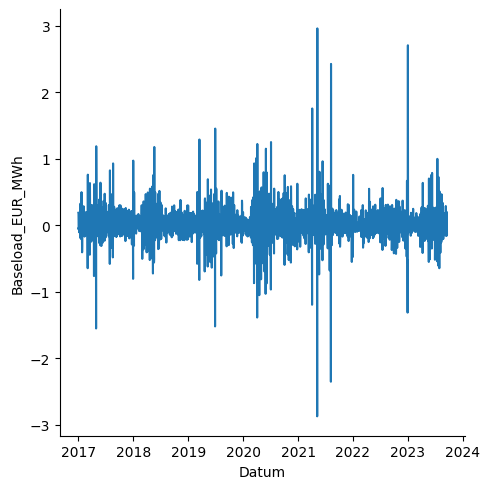

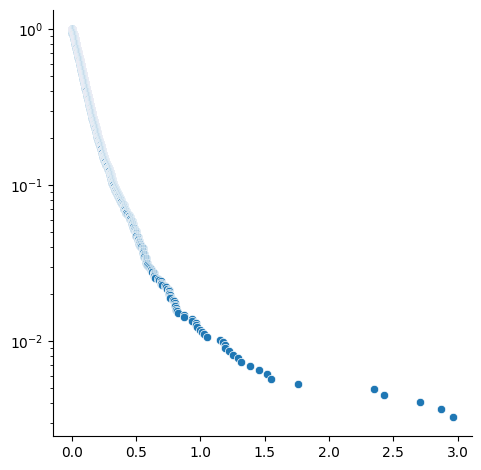

In [25]:

data = pd.read_csv("../Data/Daily_Base_Spot_Prices_CH_Energy_2017-2023.csv")
logreturns = np.log(data["Baseload_EUR_MWh"].shift(-1))-np.log(data["Baseload_EUR_MWh"])
logreturns.index = pd.to_datetime(data["Datum"])
sea.relplot(logreturns,kind="line")

logrets_clean = logreturns[:2451].dropna().to_numpy()

myecdf = sm.ECDF(np.abs(logrets_clean))

ax = sea.relplot(x = myecdf.x, y = 1-myecdf.y)
plt.yscale("log")

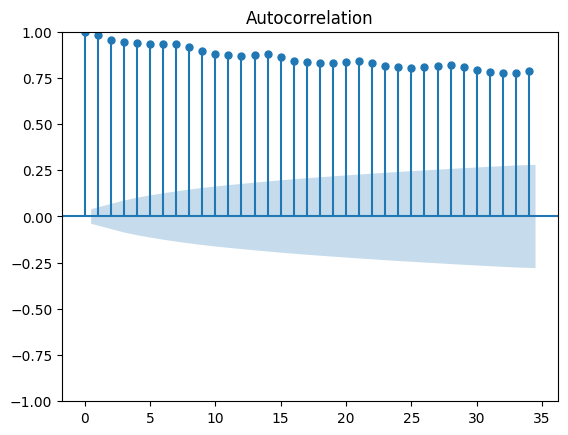

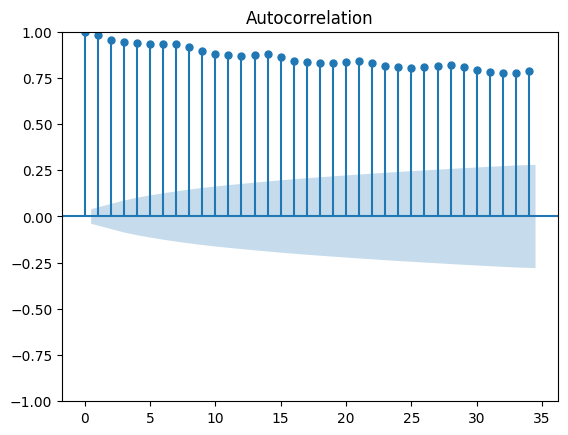

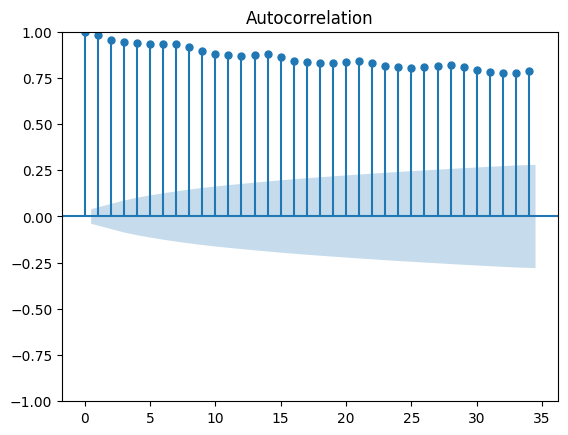

In [21]:
plot_acf(data["Baseload_EUR_MWh"])
plot_acf(np.abs(data["Baseload_EUR_MWh"]))

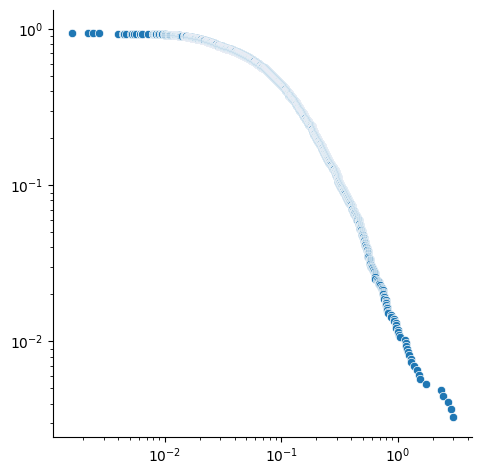

In [26]:
ax = sea.relplot(x = myecdf.x, y = 1-myecdf.y)
plt.yscale("log")
plt.xscale("log")